<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Modelos_de_Aprendizaje_Automatico-IMCA/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
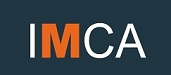


---


# CLASE: DESCOMPOSICION EN VALORES SINGULARES SVD

SVD (Singular Value Decomposition, por sus siglas en inglés) es una descomposición matricial que juega un rol fundamental en muchos campos de la matemática, ciencia de datos, procesamiento de señales, y más. En términos simples, descompone una matriz en tres componentes fundamentales. Matemáticamente, si tenemos una matriz AA de tamaño mxn, entonces la descomposición SVD se puede expresar como:

$$A=UΣV^{t}$$

Donde:
* $U$ es una matriz ortogonal de tamaño m×m. Sus columnas son los vectores singulares izquierdos de A.

* $Σ$ es una matriz diagonal de tamaño m×n, cuyas entradas son los valores singulares de A. Estos valores singulares son números no negativos que proporcionan información sobre las propiedades geométricas de la matriz.

* $V^{t}$ (la traspuesta de V) es una matriz ortogonal de tamaño n×n, cuyas columnas son los vectores singulares derechos de A.


    
    


#########    USO DE LIBRERIA PYTHON PARA CALCULO DE SVD    ##########

Imprime dim de la Imagen en escala grises:(1080, 1920)
Imprime matriz Imagen
[[240 239 239 ...  81  81  82]
 [242 241 241 ...  80  81  83]
 [243 242 242 ...  79  80  82]
 ...
 [ 94  93  91 ... 124 123 122]
 [100  98  95 ... 125 125 124]
 [ 98  99  99 ... 126 126 125]]

Imprime dimensiones de la Matriz U:(1080, 1080)
Matriz U:
[[ 0.03158874  0.03963321  0.00176752 ... -0.00706836 -0.02624784
   0.01229081]
 [ 0.03161354  0.03970382  0.00144441 ... -0.01045513  0.04717568
  -0.01571462]
 [ 0.03162874  0.03974819  0.00117916 ...  0.01554664 -0.03675659
   0.01852208]
 ...
 [ 0.0226085  -0.0120353  -0.0039874  ...  0.01246773  0.00989067
  -0.00812835]
 [ 0.02256724 -0.0125765  -0.00459941 ... -0.01013019 -0.01236291
   0.00196074]
 [ 0.02250056 -0.01268446 -0.00423504 ...  0.00409845  0.00684155
  -0.00016321]]

Imprime dimensiones de la Matriz S:(1080,)
Matriz S:
[2.39185212e+05 3.01259039e+04 2.23502987e+04 ... 7.301

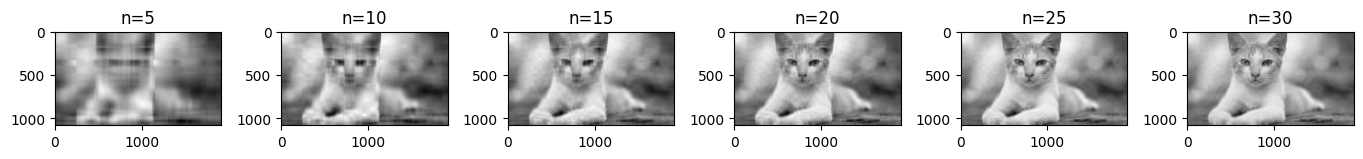

In [1]:
from sklearn.decomposition import PCA #libreria para calculo SVD
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

print("#########    USO DE LIBRERIA PYTHON PARA CALCULO DE SVD    ##########\n")
#lee el archvio gato.jpg y lo pasa a formato de grises
image = cv2.imread('/content/drive/MyDrive/FOTOS_VARIADAS/gato.jpg',cv2.IMREAD_GRAYSCALE)
print(f"Imprime dim de la Imagen en escala grises:{image.shape}")
print("Imprime matriz Imagen")
print(image)
print("")

#hace la descomposicion de valores singulares
U,S,Vt=np.linalg.svd(image,full_matrices=False)
print(f"Imprime dimensiones de la Matriz U:{U.shape}")
print("Matriz U:")
print(U)
print("")
print(f"Imprime dimensiones de la Matriz S:{S.shape}")
print("Matriz S:")
print(S)
print("")
print(f"Imprime dimensiones de la Matriz Vt:{Vt.shape}")
print("Matriz Vt:")
print(Vt)
print("")

#primero 10 valores de S
print("Primeros 10 valores de S:")
print(S[:10])
print("")

#los 10 ultimos valores de S
print("Ultimos 10 valores de S:")
print(S[-10:])
print("")

plt.figure(figsize=(16,4))
start,end,step=5,35,5
for i in range(start,end,step):
  plt.subplot(1,(end-start)//step+1,(i-start)//step+1)
  reconstructed=np.matrix(U[:,:i])*np.diag(S[:i])*np.matrix(Vt[:i,:])
  plt.imshow(reconstructed,cmap='gray')
  plt.title('n='+str(i))
plt.tight_layout()
plt.show()

#####   USO DE LIBRERIA PYTHON PARA SEPARAR X CANAL RGB DE IMAGENES   #####

Dimension de la matriz de la imagen Original:
(1080, 1920, 3)

Dimensiones de la matriz B:(1080, 1920)
Matriz B:
[[240 239 239 ...  54  54  55]
 [242 241 241 ...  53  54  56]
 [243 242 242 ...  52  53  55]
 ...
 [ 94  93  91 ... 122 121 120]
 [100  98  95 ... 123 123 122]
 [ 98  99  99 ... 124 124 123]]

Dimensiones de la matriz G:(1080, 1920)
Matriz G:
[[240 239 239 ...  90  90  91]
 [242 241 241 ...  89  90  92]
 [243 242 242 ...  88  89  91]
 ...
 [ 96  95  93 ... 127 125 124]
 [102 100  96 ... 128 128 127]
 [100 101 100 ... 129 129 128]]

Dimensiones de la matriz R:(1080, 1920)
Matriz R:
[[240 239 239 ...  73  73  74]
 [242 241 241 ...  72  73  75]
 [243 242 242 ...  71  72  74]
 ...
 [ 90  89  87 ... 118 119 118]
 [ 96  94  92 ... 119 119 118]
 [ 94  95  96 ... 120 120 119]]



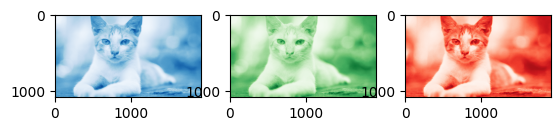

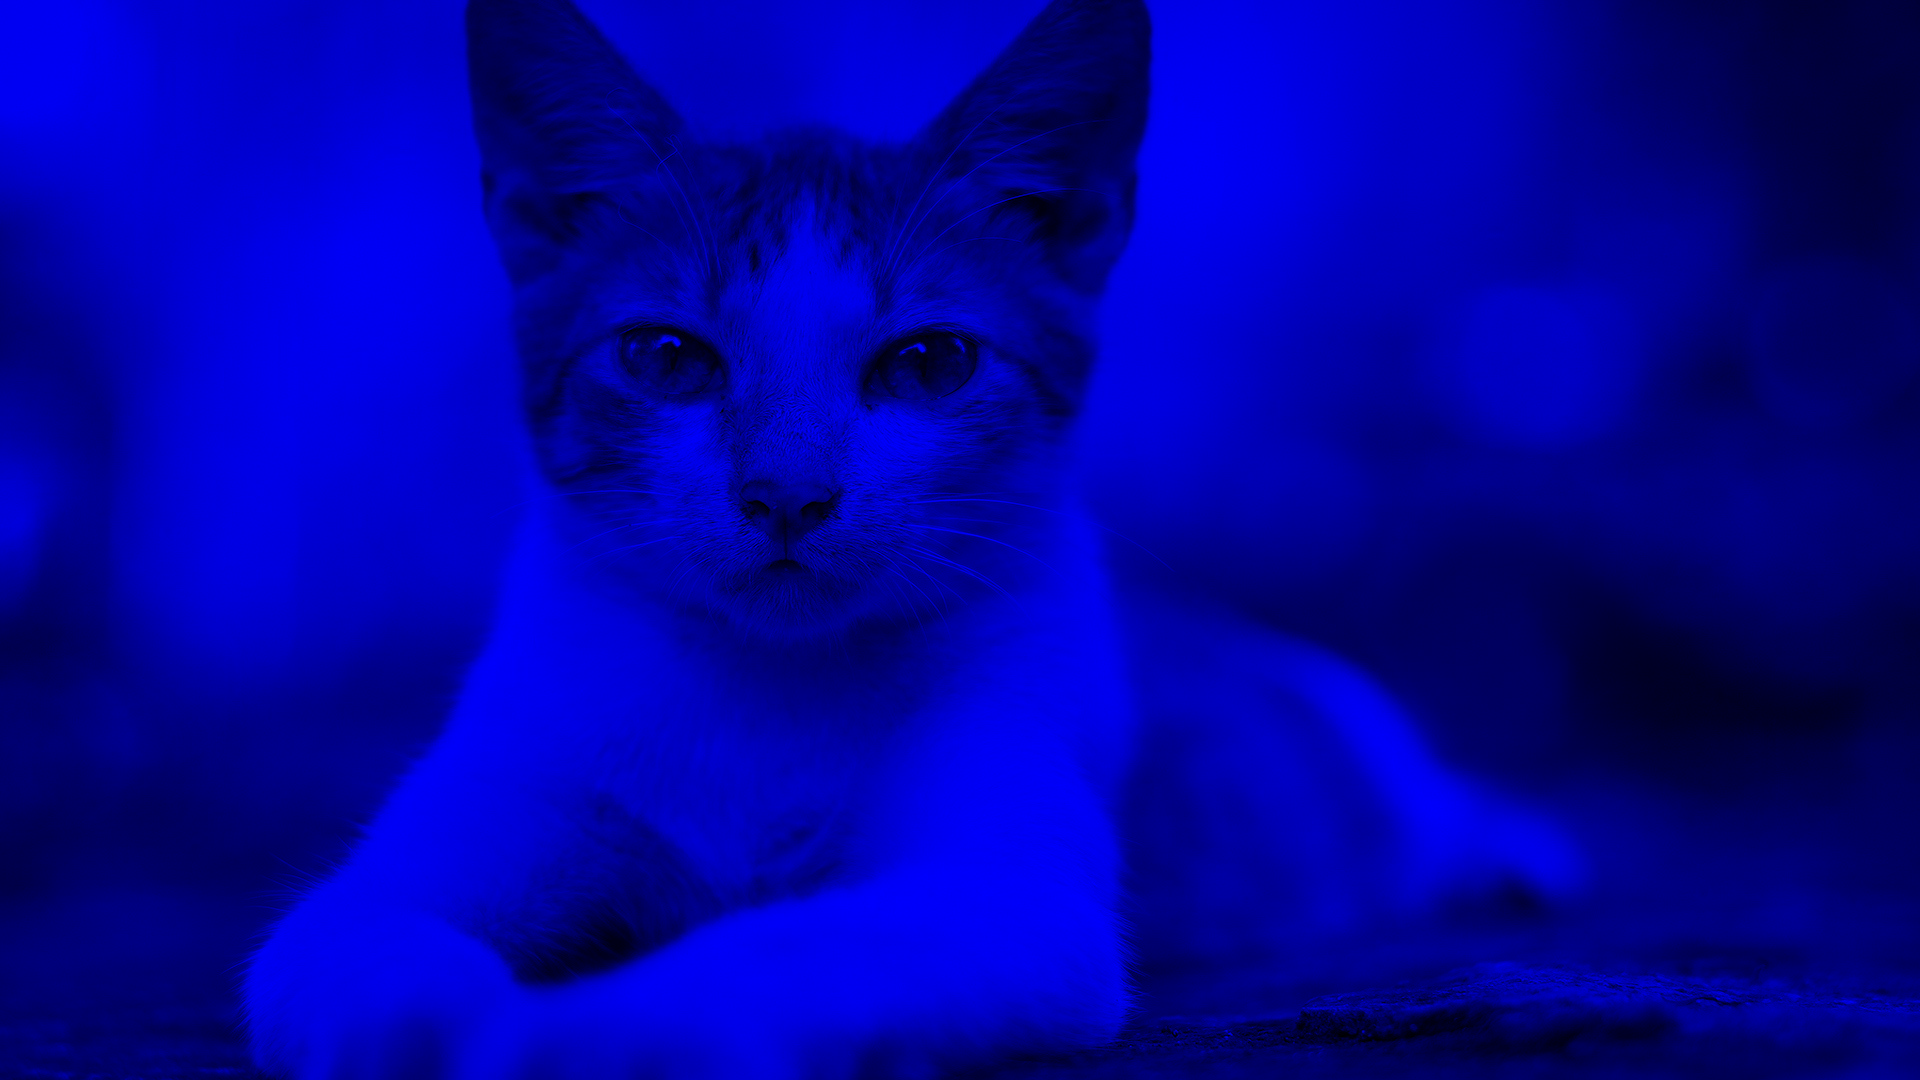

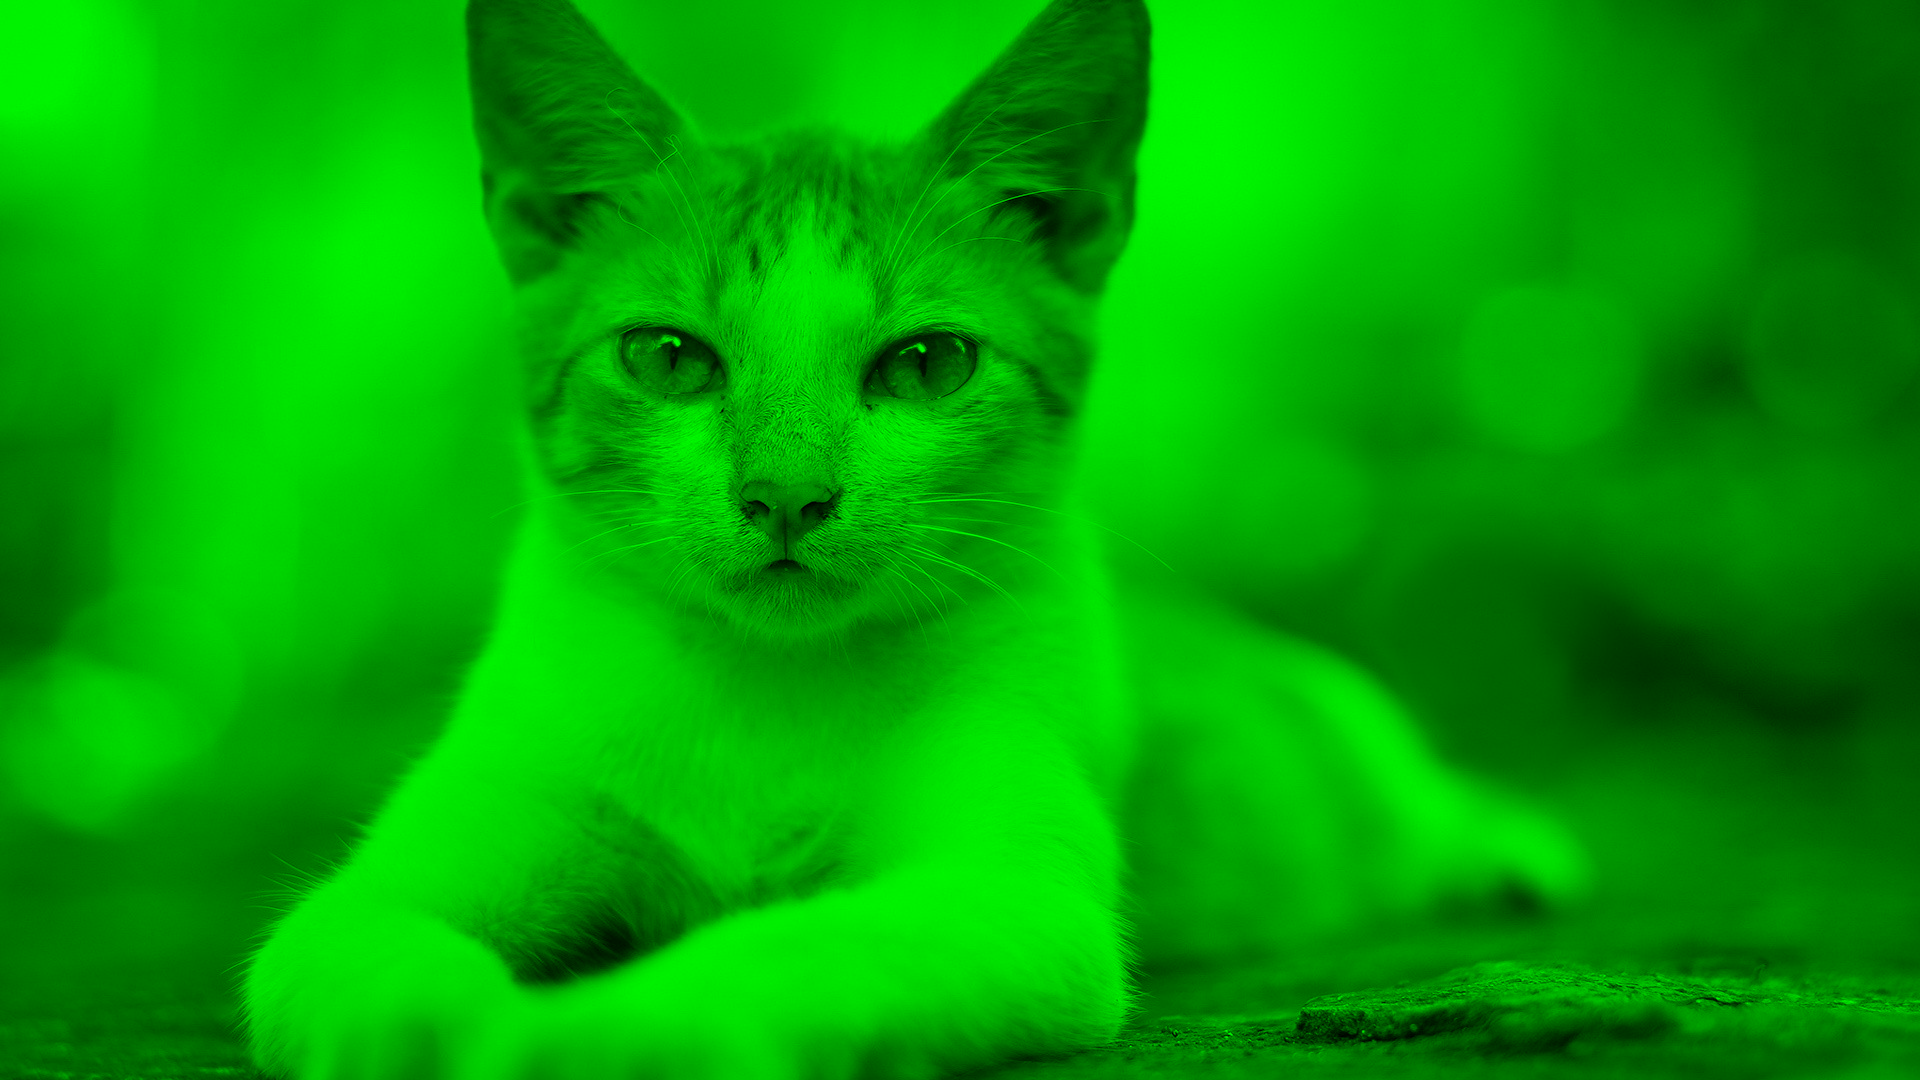

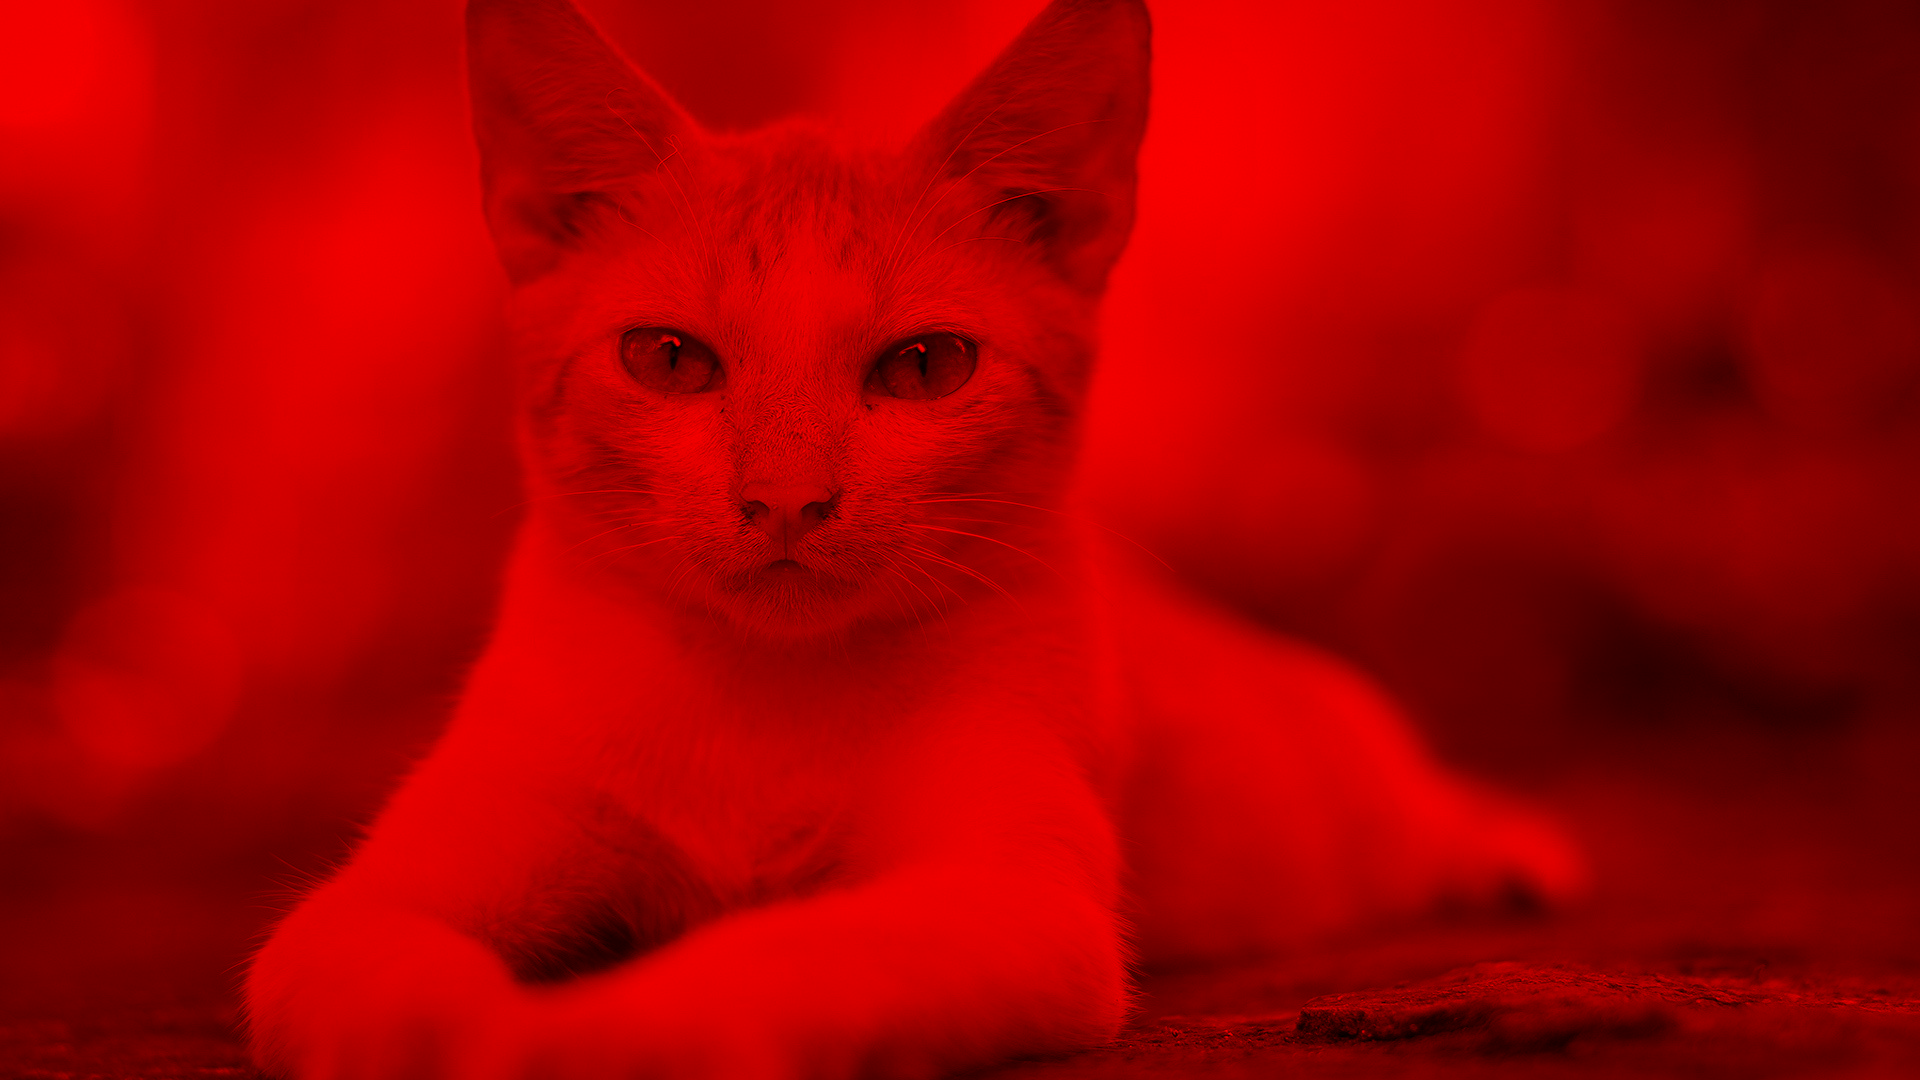

In [ ]:
from google.colab.patches import cv2_imshow  # Esta es la función para mostrar imágenes en Colab

#separar la imagen por cada canal RGB
print("#####   USO DE LIBRERIA PYTHON PARA SEPARAR X CANAL RGB DE IMAGENES   #####\n")
#lectura de la imagen en formato RGB (en colores)
color_image=cv2.imread('/content/drive/MyDrive/FOTOS_VARIADAS/gato.jpg')
#separacion de los canales RGB
B,G,R=cv2.split(color_image)
print("Dimension de la matriz de la imagen Original:")
print(color_image.shape)
print("")
print(f"Dimensiones de la matriz B:{B.shape}")
print("Matriz B:")
print(B)
print("")
print(f"Dimensiones de la matriz G:{G.shape}")
print("Matriz G:")
print(G)
print("")
print(f"Dimensiones de la matriz R:{R.shape}")
print("Matriz R:")
print(R)
print("")
#solo plotea las intensidades de cada canal, pero le damos un toque de color
plt.subplot(1,3,1)
plt.imshow(G,cmap='Blues_r')

plt.subplot(1,3,2)
plt.imshow(R,cmap='Greens_r')

plt.subplot(1,3,3)
plt.imshow(B,cmap='Reds_r')

plt.show()

# Crear imágenes para cada canal
# Para el canal azul: dejamos B tal como está, pero G y R los ponemos a cero
azul = cv2.merge([B, np.zeros_like(G), np.zeros_like(R)])

# Para el canal verde: dejamos G tal como está, pero B y R los ponemos a cero
verde = cv2.merge([np.zeros_like(B), G, np.zeros_like(R)])

# Para el canal rojo: dejamos R tal como está, pero B y G los ponemos a cero
rojo = cv2.merge([np.zeros_like(B), np.zeros_like(G), R])

# Mostrar los canales por separado usando cv2_imshow
cv2_imshow(azul)  # Canal Azul
cv2_imshow(verde)  # Canal Verde
cv2_imshow(rojo)  # Canal Rojo

# Esperar a que se pulse una tecla y cerrar las ventanas
cv2.waitKey(0)
cv2.destroyAllWindows()




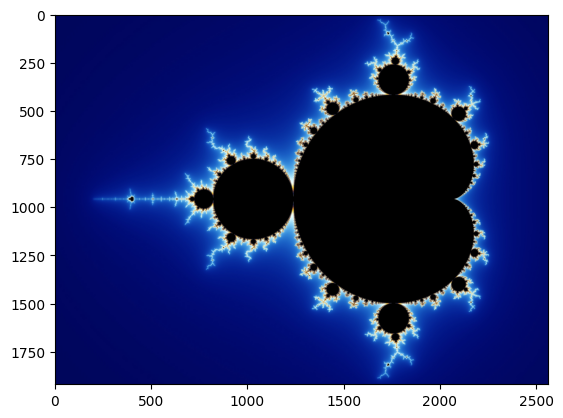

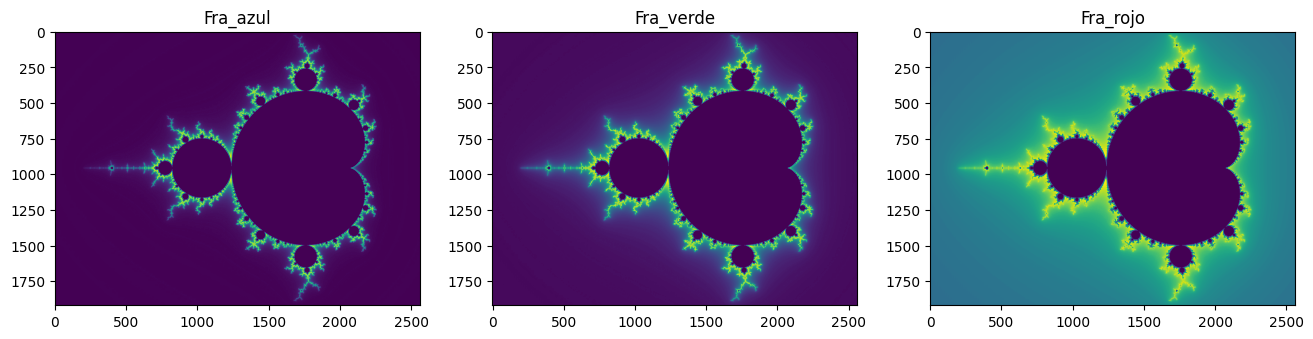

In [ ]:
#USANDO LIBRERIA COMPLETA

img=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/FOTOS_VARIADAS/fractal.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
#separa por canales RGB
blue,green, red=cv2.split(img)
fig=plt.figure(figsize=(16,8))

#plotea cada canal, con un toque de color
fig.add_subplot(131)
plt.title('Fra_azul')
plt.imshow(blue)

fig.add_subplot(132)
plt.title('Fra_verde')
plt.imshow(green)

fig.add_subplot(133)
plt.title('Fra_rojo')
plt.imshow(red)

plt.show()

#########   Calculo de PCA usando Librerias de Python    #########
Dimension de la imagen Original:
(1920, 2560, 3)

############ Normalizando la matriz origuinal de la IMAGEN ############
Dimension de la imagen Normalizada Blue:
(1920, 2560)
Matriz Blue normalizada
[[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.         0.         0.         ... 0.00392157 0.00392157 0.00392157]
 [0.         0.         0.         ... 0.00392157 0.00392157 0.00392157]
 [0.         0.         0.         ... 0.00392157 0.00392157 0.00392157]]

Dimension de la imagen Normalizada Green:
(1920, 2560)
Matriz Green normalizada
[[0.02352941 0.02352941 0.02352941 ... 0.02352941 0.02352941 0.02352941]
 [0.02352941 0.02352941 0.02352941 ... 0.02352941 0.02352941 0.02352941]
 [0.02352941 0.02352941 0.02352941 ... 0.02352941 0.02352941 0

Dimension de la imagen recosntruida
(1920, 2560, 3)


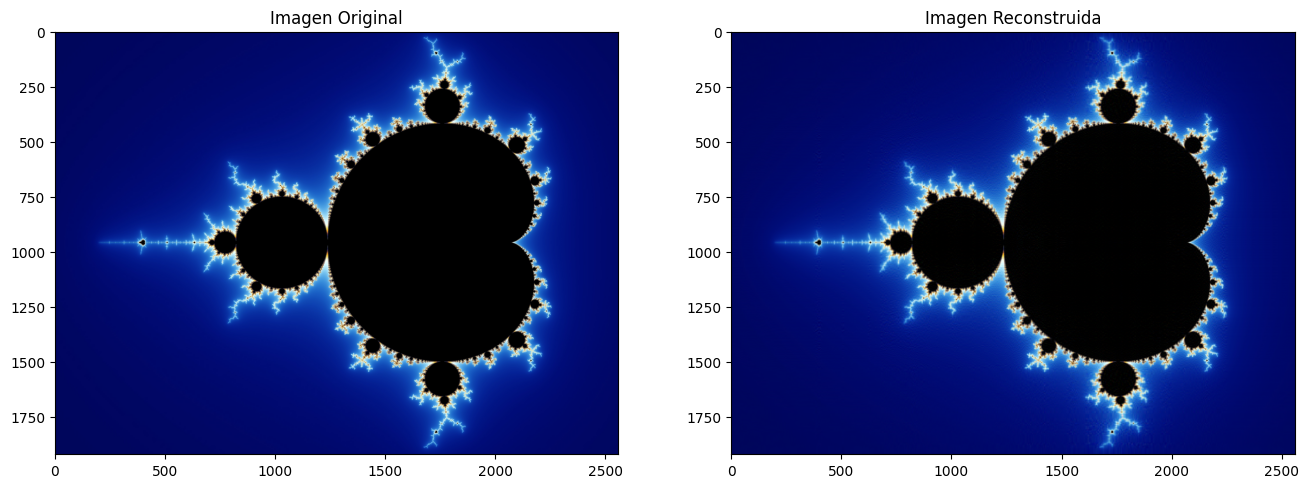

In [ ]:
#Calculo de PCA
print("#########   Calculo de PCA usando Librerias de Python    #########")
print("Dimension de la imagen Original:")
print(img.shape)
print("")

#normalizando cada canal
df_blue=blue/255
df_green=green/255
df_red=red/255
#ploteo de las dimensiones y matrizes normalizadas
print("############ Normalizando la matriz origuinal de la IMAGEN ############")
print("Dimension de la imagen Normalizada Blue:")
print(df_blue.shape)
print("Matriz Blue normalizada")
print(df_blue)
print("")

print("Dimension de la imagen Normalizada Green:")
print(df_green.shape)
print("Matriz Green normalizada")
print(df_green)
print("")

print("Dimension de la imagen Normalizada Red:")
print(df_red.shape)
print("Matriz Red normalizada")
print(df_red)
print("")

# Crear un objeto PCA y reducir la dimensionalidad a 100 componentes principales
pca_b=PCA(n_components=100)
pca_g=PCA(n_components=100)
pca_r=PCA(n_components=100)
# Ajustar PCA a los datos, por cada canal
pca_b.fit(df_blue)
pca_g.fit(df_green)
pca_r.fit(df_red)
# Transformar los datos originales a las nuevas componentes principales
trans_pca_b=pca_b.transform(df_blue)
trans_pca_g=pca_g.transform(df_green)
trans_pca_r=pca_r.transform(df_red)

#impresion de las dimensiones
print("#######################      Calculo de PCA     #######################")
print("Dimension de la imagen Transformada Blue:")
print(trans_pca_b.shape)
print("Matriz trans_pca_b")
print(trans_pca_b)
print("")
print("Dimension de la imagen Transformada Green:")
print(trans_pca_g.shape)
print("Matriz trans_pca_g")
print(trans_pca_g)
print("")
print("Dimension de la imagen Transformada Red:")
print(trans_pca_r.shape)
print("Matriz trans_pca_r")
print(trans_pca_r)
print("")

#valores singulares para cada PCA
print("##############  Valores singulares por cada canal RGB  ###############")
print("Valores singulares por cada canal Blue")
print(pca_b.singular_values_)
print("")
print("Valores singulares por cada canal Green")
print(pca_g.singular_values_)
print("")
print("Valores singulares por cada canal Red")
print(pca_r.singular_values_)
print("")

#porcentaje de varianza
print("#############  Porcentaje de varianza por cada canal RGB  #############")
print(f"Azul Chanel:{pca_b.explained_variance_ratio_.sum()}")
print(f"Verde Chanel:{pca_g.explained_variance_ratio_.sum()}")
print(f"Rojo Chanel:{pca_r.explained_variance_ratio_.sum()}")
print("")

print("##########  Reconstruccion de Imagen despues de aplicar PCA  ##########")
#recuperacion de las matricez con la dimension inicial
#Invertir la transformación para obtener una aproximación de los datos originales
b_arr=pca_b.inverse_transform(trans_pca_b)
g_arr=pca_g.inverse_transform(trans_pca_g)
r_arr=pca_r.inverse_transform(trans_pca_r)
print("Dimension de la imagen inversa de Blue:")
print(b_arr.shape)
print("Matriz imagen inversa de Blue:")
print(b_arr)
print("")

print("Dimension de la imagen inversa de Green:")
print(g_arr.shape)
print("Matriz imagen inversa de Green:")
print(g_arr)
print("")

print("Dimension de la imagen inversa de Red:")
print(r_arr.shape)
print("Matriz imagen inversa de Red:")
print(r_arr)
print("")

#recontrucion de la imagen con la data reducida.
img_reconstructed=cv2.merge((b_arr, g_arr, r_arr))
print("Dimension de la imagen recosntruida")
print(img_reconstructed.shape)

fig=plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.title('Imagen Original')
plt.imshow(img)
fig.add_subplot(122)
plt.title('Imagen Reconstruida')
plt.imshow(img_reconstructed)

plt.show()


In [ ]:
#cargar caracteristica de vino.csv
df=pd.read_csv('caracteristicas de vinos.csv')

print(df.shape)

print(df.head(20))

(178, 14)
    Vino  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1      2    13.20   1.78  2.14        11.2        100     2.65        2.76   
2      3    13.16   2.36  2.67        18.6        101     2.80        3.24   
3      4    14.37   1.95  2.50        16.8        113     3.85        3.49   
4      5    13.24   2.59  2.87        21.0        118     2.80        2.69   
5      6    14.20   1.76  2.45        15.2        112     3.27        3.39   
6      7    14.39   1.87  2.45        14.6         96     2.50        2.52   
7      8    14.06   2.15  2.61        17.6        121     2.60        2.51   
8      9    14.83   1.64  2.17        14.0         97     2.80        2.98   
9     10    13.86   1.35  2.27        16.0         98     2.98        3.15   
10    11    14.10   2.16  2.30        18.0        105     2.95        3.32   
11    12    14.12   1.48  2.32        16.8         95 